# R Example Using Graphs

Taken straight from: https://r-graph-gallery.com/297-circular-barplot-with-groups.html

Warning message:
“Removed 10 rows containing missing values (position_stack).”
Warning message:
“Removed 10 rows containing missing values (geom_text).”


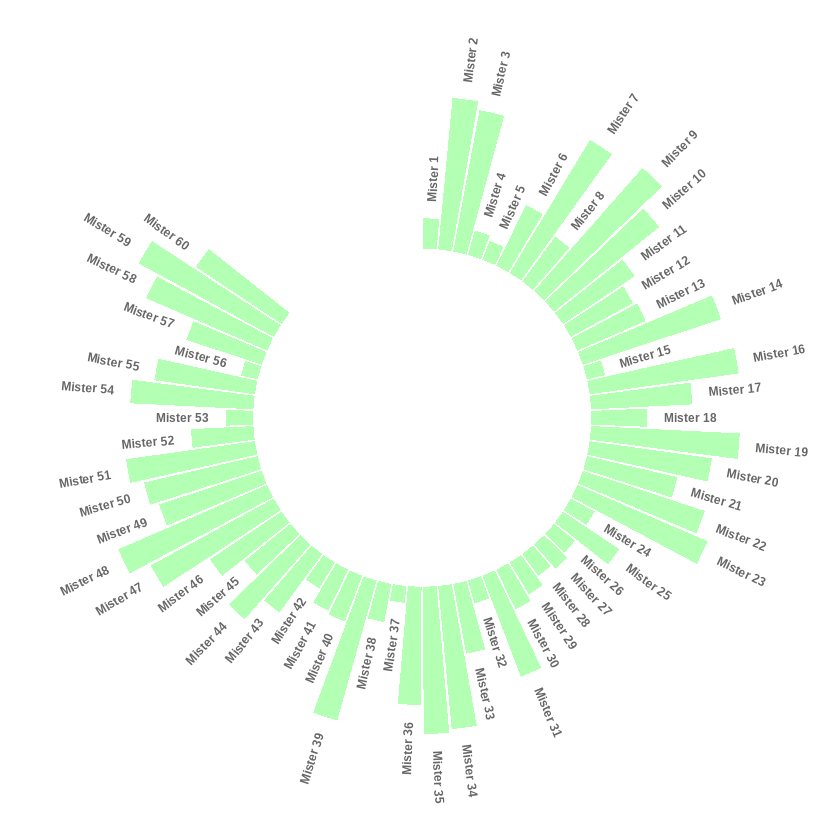

In [2]:
# library
library(tidyverse)
 
# Create dataset
data <- data.frame(
  individual=paste( "Mister ", seq(1,60), sep=""),
  value=sample( seq(10,100), 60, replace=T)
)
 
# Set a number of 'empty bar'
empty_bar <- 10
 
# Add lines to the initial dataset
to_add <- matrix(NA, empty_bar, ncol(data))
colnames(to_add) <- colnames(data)
data <- rbind(data, to_add)
data$id <- seq(1, nrow(data))
 
# Get the name and the y position of each label
label_data <- data
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_data$hjust <- ifelse( angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle+180, angle)
 
# Make the plot
p <- ggplot(data, aes(x=as.factor(id), y=value)) +       # Note that id is a factor. If x is numeric, there is some space between the first bar
  geom_bar(stat="identity", fill=alpha("green", 0.3)) +
  ylim(-100,120) +
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") 
  ) +
  coord_polar(start = 0) + 
  geom_text(data=label_data, aes(x=id, y=value+10, label=individual, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2.5, angle= label_data$angle, inherit.aes = FALSE ) 
 
p